---

```
Michal Chowaniak
```

---

# **CSC 578 FINAL PROJECT**

Project description, click [here](http://condor.depaul.edu/ntomuro/courses/578/assign/FinalProject-Kaggle-2019spring.html).
&nbsp;





&nbsp;

---

---

## IMPORTS

---

In [1]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation, Flatten, BatchNormalization, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.layers import Conv2D, Lambda, MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD, RMSprop, Adagrad, Adamax, Nadam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import os
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
if K.backend() != 'tensorflow':
    raise RuntimeError('This example can only run with the '
                       'TensorFlow backend, '
                       'because it requires TF-native augmentation APIs')

import tensorflow as tf
import numpy as np
np.set_printoptions(suppress=True)
import h5py
import matplotlib.pyplot as plt
from matplotlib import pyplot
np.random.seed(1000)
import pandas as pd
from pandas import read_csv
import seaborn as sns
import csv
import time



Using TensorFlow backend.


---

## LOAD DATA

---

In [2]:
os.getcwd()

'/home/ec2-user/SageMaker/CSC578FinalMichalChowaniak'

In [3]:
train = pd.read_csv('/home/ec2-user/SageMaker/CSC578FinalMichalChowaniak/climate_hour_train.csv', sep=",")

In [4]:
test_x = pd.read_csv('/home/ec2-user/SageMaker/CSC578FinalMichalChowaniak/climate_Xtest.csv', sep=",", header=None)

---

## PREPROCESS DATA

---

In [5]:
train.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
1,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
3,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
4,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [6]:
train.shape

(52566, 15)

In [7]:
train.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000
mean,988.723002,9.172795,283.254265,4.779049,76.444300,13.357483,9.458133,3.899249,5.977212,9.568031,1216.718989,2.142170,3.539017,173.689628
std,8.190684,8.533081,8.605048,6.922701,16.430164,7.572008,4.201679,4.723265,2.666892,4.253017,40.439912,1.530832,2.313246,87.251111
min,918.500000,-22.760000,250.850000,-24.800000,13.060000,0.970000,0.810000,0.000000,0.510000,0.810000,1066.190000,0.000000,0.000000,0.000000
25%,983.750000,3.110000,277.242500,0.130000,65.810000,7.640000,6.170000,0.810000,3.890000,6.240000,1188.082500,1.010000,1.800000,120.800000
50%,989.140000,9.310000,283.430000,5.200000,79.700000,11.740000,8.850000,2.090000,5.595000,8.965000,1213.440000,1.790000,3.000000,197.100000
75%,994.070000,15.280000,289.370000,10.030000,89.800000,17.390000,12.320000,5.130000,7.780000,12.450000,1243.050000,2.880000,4.750000,233.800000
max,1012.740000,35.480000,309.690000,22.940000,100.000000,57.800000,28.040000,41.710000,17.940000,28.530000,1392.560000,12.580000,20.330000,360.000000


```
Check data types
```

In [8]:
print(train.dtypes.to_string())

Date Time           object
p (mbar)           float64
T (degC)           float64
Tpot (K)           float64
Tdew (degC)        float64
rh (%)             float64
VPmax (mbar)       float64
VPact (mbar)       float64
VPdef (mbar)       float64
sh (g/kg)          float64
H2OC (mmol/mol)    float64
rho (g/m**3)       float64
wv (m/s)           float64
max. wv (m/s)      float64
wd (deg)           float64


In [9]:
#Check for NA
train.isnull().sum().sum()

0

In [10]:
columnNames = list(train.head(0))
print(columnNames)

['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)']


In [11]:
#drop Data Time
train=train.drop('Date Time',axis=1)


In [12]:
train.tail()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
52561,1006.20,2.27,274.94,1.96,97.8,7.19,7.04,0.16,4.36,6.99,1269.29,0.48,1.28,120.3
52562,1006.28,2.14,274.81,1.89,98.2,7.13,7.00,0.13,4.34,6.96,1269.97,0.68,1.68,119.3
52563,1006.69,1.96,274.60,1.72,98.3,7.04,6.92,0.12,4.29,6.87,1271.36,0.67,1.56,145.3
52564,1006.92,1.94,274.56,1.75,98.6,7.03,6.93,0.10,4.29,6.88,1271.74,0.71,1.80,129.6
52565,1007.11,2.18,274.78,2.01,98.8,7.15,7.06,0.09,4.37,7.01,1270.82,0.35,0.86,140.8


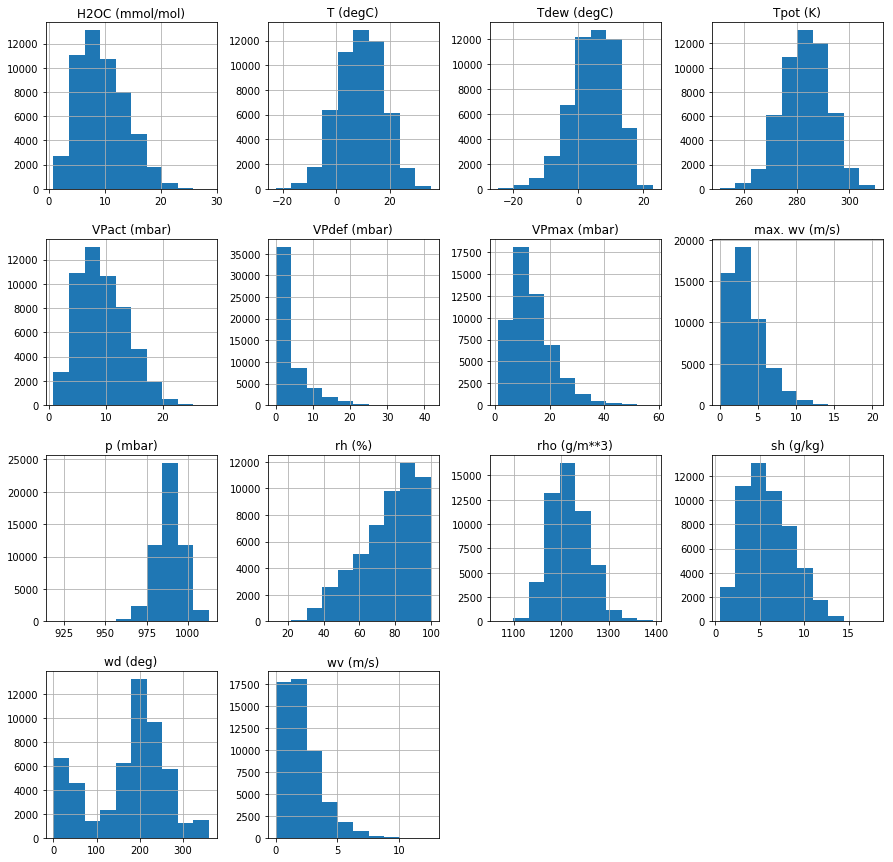

In [13]:
#show histograms
train.hist(figsize=(15,15))
plt.show()

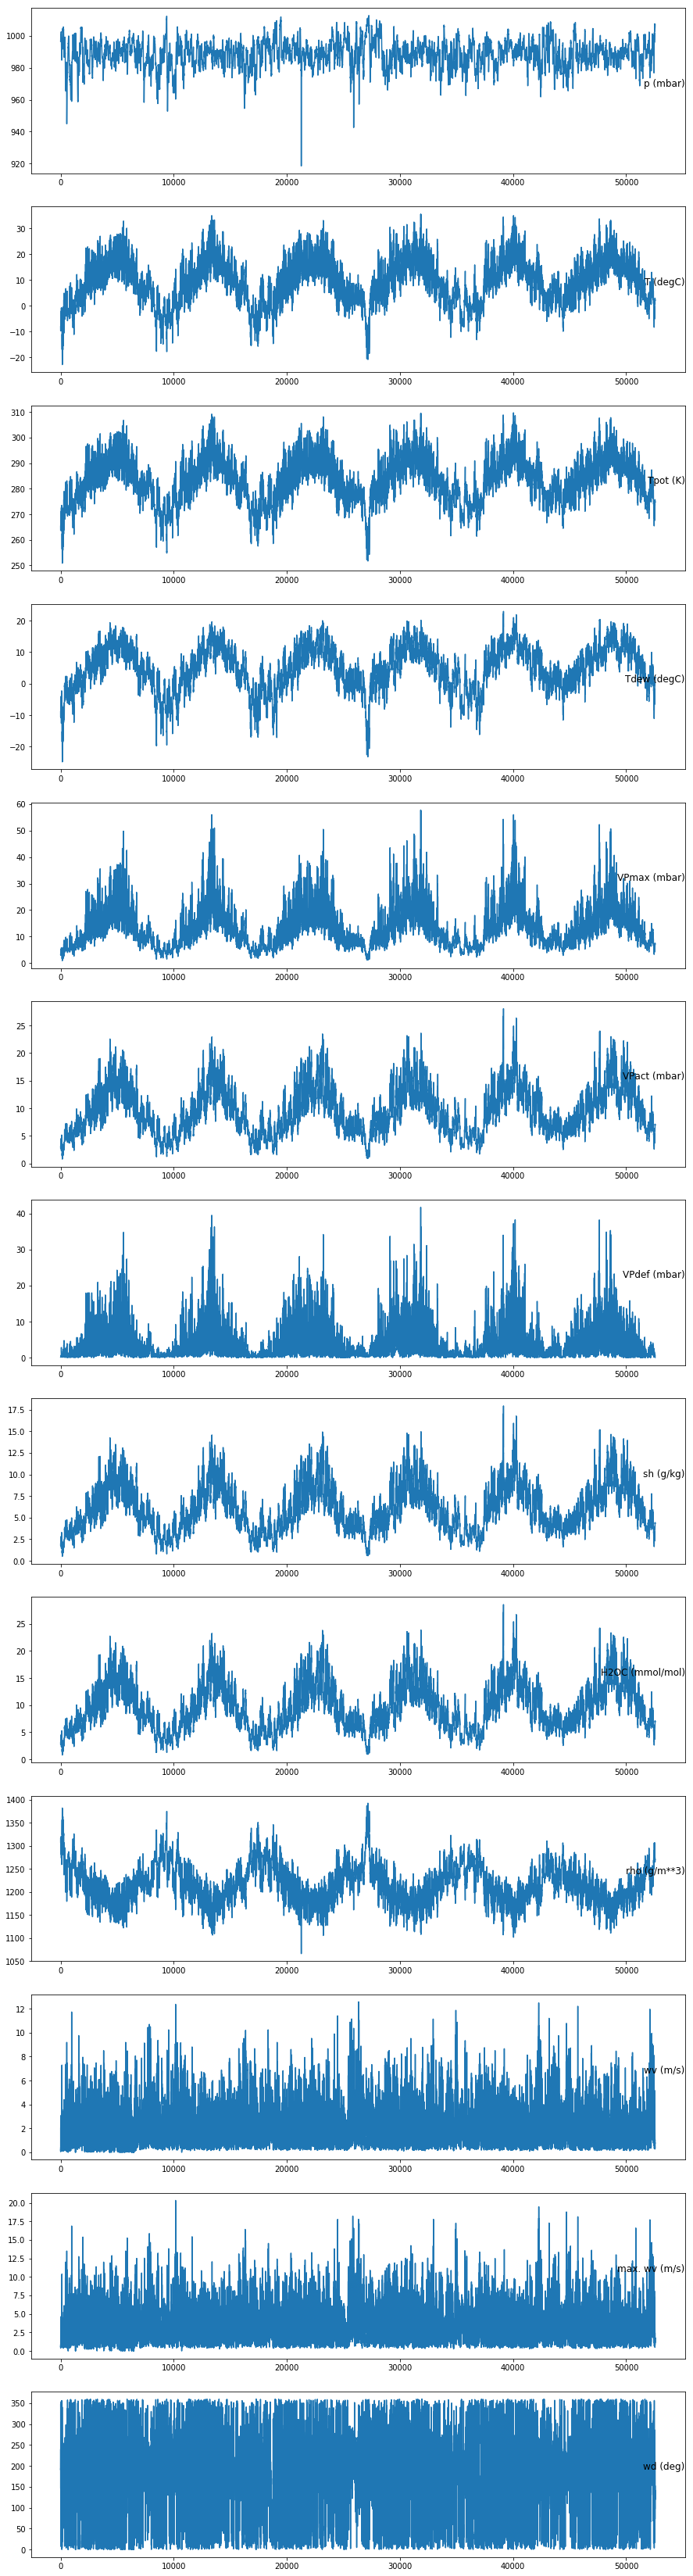

In [14]:
# plot time 

values = train.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13]
i = 1
# plot each column
pyplot.figure(figsize=(15, 60))
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(train.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()
#pyplot.savefig('test.png', dpi=100)
pyplot.close()

In [15]:
#crate train_y
train_y = (train['T (degC)'])
print(train_y.shape)
print(train_y.tail())

(52566,)
52561    2.27
52562    2.14
52563    1.96
52564    1.94
52565    2.18
Name: T (degC), dtype: float64


In [16]:
#repalce outliers in test

In [16]:
test_x.head()

,0,1,2,3,4,5,6,7,8,9,...,326,327,328,329,330,331,332,333,334,335
0,1007.19,2.06,274.65,1.89,98.8,7.09,7.00,0.09,4.34,6.95,...,92.0,6.83,6.29,0.55,3.91,6.27,1268.31,3.10,4.61,157.8
1,1007.06,2.22,274.82,2.06,98.9,7.17,7.09,0.08,4.39,7.04,...,89.8,6.94,6.23,0.71,3.88,6.22,1266.15,2.74,4.37,157.9
2,1007.43,2.04,274.61,1.87,98.8,7.08,6.99,0.08,4.33,6.94,...,89.8,6.91,6.20,0.70,3.86,6.20,1265.64,1.05,2.68,135.9
3,1007.87,1.79,274.34,1.63,98.8,6.95,6.87,0.08,4.25,6.82,...,88.9,6.98,6.20,0.77,3.87,6.20,1264.11,1.67,2.96,97.5
4,1007.79,2.12,274.66,1.99,99.1,7.12,7.05,0.06,4.36,7.00,...,81.6,7.27,5.93,1.34,3.70,5.94,1259.97,2.36,4.45,161.3


In [17]:
test_x2=test_x.replace([-9999,9999], 0)

In [18]:
#save data frame to csv file
test_x2.to_csv('climate_Xtest2.csv', sep=",", index=False, header = None)

## LSTM Data Preparation

In [19]:
#prepare data for time series
first, last = 0, 24
train_x_ts = []

for i in range(len(train) - 24):
    if len(train.iloc[first:last]) == 24:
        lst = [item for sublist in train.iloc[first:last].values.tolist() for item in sublist]
        first += 1
        last += 1
    train_x_ts.append(lst)
print (train_x_ts[:1])
print(len(train_x_ts[0]))

[[996.5, -8.05, 265.38, -8.78, 94.4, 3.33, 3.14, 0.19, 1.96, 3.15, 1307.86, 0.21, 0.63, 192.7, 996.62, -8.88, 264.54, -9.77, 93.2, 3.12, 2.9, 0.21, 1.81, 2.91, 1312.25, 0.25, 0.63, 190.3, 996.84, -8.81, 264.59, -9.66, 93.5, 3.13, 2.93, 0.2, 1.83, 2.94, 1312.18, 0.18, 0.63, 167.2, 996.99, -9.05, 264.34, -10.02, 92.6, 3.07, 2.85, 0.23, 1.78, 2.85, 1313.61, 0.1, 0.38, 240.0, 997.46, -9.63, 263.72, -10.65, 92.2, 2.94, 2.71, 0.23, 1.69, 2.71, 1317.19, 0.4, 0.88, 157.0, 997.71, -9.67, 263.66, -10.62, 92.7, 2.93, 2.71, 0.21, 1.69, 2.72, 1317.71, 0.05, 0.5, 146.0, 998.33, -9.17, 264.12, -10.1, 92.9, 3.04, 2.83, 0.22, 1.76, 2.83, 1315.98, 2.08, 2.88, 348.8, 999.17, -8.1, 265.12, -9.05, 92.8, 3.31, 3.07, 0.24, 1.92, 3.08, 1311.65, 0.72, 1.25, 213.9, 999.69, -7.66, 265.52, -8.84, 91.2, 3.43, 3.13, 0.3, 1.95, 3.13, 1310.14, 0.34, 0.63, 202.2, 1000.27, -7.04, 266.1, -8.17, 91.6, 3.6, 3.3, 0.3, 2.05, 3.29, 1307.76, 1.45, 3.0, 292.6, 1000.87, -7.41, 265.68, -8.66, 90.7, 3.5, 3.17, 0.33, 1.97, 3.17, 1

In [20]:
train_y_ts = train_y[24:52566].values.tolist()

In [21]:
print(train_y_ts[:15])
print(len(train_y_ts))

[-4.44, -4.29, -4.45, -4.58, -4.96, -4.43, -4.28, -4.33, -4.13, -3.93, -3.62, -3.12, -2.53, -2.56, -2.12]
52542


In [35]:
#normalization

In [22]:
#scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaler = preprocessing.MinMaxScaler()

In [37]:
#scalar = preprocessing.StandardScaler()

In [23]:
train_x_ts_norm = scaler.fit_transform(train_x_ts)

In [24]:
train_x_ts_norm[1]

array([0.82894737, 0.23832418, 0.23266485, 0.31483033, 0.92178514,
       0.03783213, 0.07675358, 0.00503476, 0.07458405, 0.07575758,
       0.75392959, 0.01987281, 0.03098869, 0.52861111, 0.83128183,
       0.2395261 , 0.23351462, 0.31713448, 0.92523579, 0.03800809,
       0.07785531, 0.00479501, 0.0757315 , 0.07683983, 0.75371511,
       0.01430843, 0.03098869, 0.46444444, 0.83287351, 0.23540522,
       0.22926581, 0.30959363, 0.91488383, 0.03695231, 0.07491737,
       0.00551427, 0.07286288, 0.07359307, 0.75809664, 0.00794913,
       0.01869159, 0.66666667, 0.83786078, 0.22544643, 0.21872876,
       0.29639715, 0.91028295, 0.03466479, 0.06977598, 0.00551427,
       0.06769937, 0.06854257, 0.76906578, 0.0317965 , 0.04328578,
       0.43611111, 0.84051358, 0.22475962, 0.21770904, 0.29702556,
       0.91603405, 0.03448883, 0.06977598, 0.00503476, 0.06769937,
       0.06890332, 0.77065907, 0.00397456, 0.0245942 , 0.40555556,
       0.84709253, 0.23334478, 0.22552685, 0.30791789, 0.91833

In [123]:
#reshape

In [25]:
train_y_ts_norm = np.array(train_y_ts)
train_x_ts_norm2 = np.reshape(np.array(train_x_ts_norm),(52542, 24, 14))

In [26]:
print ("Train y shape: ", train_y_ts_norm.shape)
print ("Train x shape: ", train_x_ts_norm2.shape)

Train y shape:  (52542,)
Train x shape:  (52542, 24, 14)


In [27]:
train_x_ts_norm2[1]


array([[0.82894737, 0.23832418, 0.23266485, 0.31483033, 0.92178514,
        0.03783213, 0.07675358, 0.00503476, 0.07458405, 0.07575758,
        0.75392959, 0.01987281, 0.03098869, 0.52861111],
       [0.83128183, 0.2395261 , 0.23351462, 0.31713448, 0.92523579,
        0.03800809, 0.07785531, 0.00479501, 0.0757315 , 0.07683983,
        0.75371511, 0.01430843, 0.03098869, 0.46444444],
       [0.83287351, 0.23540522, 0.22926581, 0.30959363, 0.91488383,
        0.03695231, 0.07491737, 0.00551427, 0.07286288, 0.07359307,
        0.75809664, 0.00794913, 0.01869159, 0.66666667],
       [0.83786078, 0.22544643, 0.21872876, 0.29639715, 0.91028295,
        0.03466479, 0.06977598, 0.00551427, 0.06769937, 0.06854257,
        0.76906578, 0.0317965 , 0.04328578, 0.43611111],
       [0.84051358, 0.22475962, 0.21770904, 0.29702556, 0.91603405,
        0.03448883, 0.06977598, 0.00503476, 0.06769937, 0.06890332,
        0.77065907, 0.00397456, 0.0245942 , 0.40555556],
       [0.84709253, 0.23334478, 0.2

In [127]:
# read test dataset without outliers


In [152]:
# import csv
# test = []
# with open('climate_Xtest2.csv') as data:
#     reader = csv.reader(data, delimiter=',', quoting=csv.QUOTE_NONNUMERIC)
#     for row in reader:
#         test.append(row)

# print (test[0:3])



[[1007.19, 2.06, 274.65, 1.89, 98.8, 7.09, 7.0, 0.09, 4.34, 6.95, 1271.51, 0.41, 0.92, 273.8, 1007.06, 2.22, 274.82, 2.06, 98.9, 7.17, 7.09, 0.08, 4.39, 7.04, 1270.58, 0.43, 0.88, 119.1, 1007.43, 2.04, 274.61, 1.87, 98.8, 7.08, 6.99, 0.08, 4.33, 6.94, 1271.93, 0.86, 1.64, 145.9, 1007.87, 1.79, 274.34, 1.63, 98.8, 6.95, 6.87, 0.08, 4.25, 6.82, 1273.66, 0.82, 1.72, 140.6, 1007.79, 2.12, 274.66, 1.99, 99.1, 7.12, 7.05, 0.06, 4.36, 7.0, 1271.98, 0.43, 1.04, 86.2, 1007.68, 2.46, 275.02, 2.25, 98.5, 7.3, 7.19, 0.11, 4.45, 7.13, 1270.17, 0.24, 0.52, 247.2, 1007.53, 1.93, 274.5, 1.64, 97.9, 7.02, 6.88, 0.15, 4.26, 6.82, 1272.59, 0.49, 1.08, 222.8, 1007.55, 1.79, 274.36, 1.48, 97.8, 6.95, 6.8, 0.15, 4.21, 6.75, 1273.3, 0.7, 1.06, 202.6, 1008.31, 1.75, 274.26, 1.47, 98.0, 6.93, 6.79, 0.14, 4.2, 6.74, 1274.47, 0.38, 0.72, 195.6, 1008.91, 1.45, 273.91, 1.06, 97.2, 6.78, 6.59, 0.19, 4.08, 6.54, 1276.71, 0.52, 0.8, 86.4, 1008.65, 1.49, 273.98, 1.16, 97.6, 6.81, 6.64, 0.16, 4.11, 6.59, 1276.15, 0.92,

In [28]:
#read test with outliers

import csv
test = []
with open('climate_Xtest.csv') as data:
    reader = csv.reader(data, delimiter=',', quoting=csv.QUOTE_NONNUMERIC)
    for row in reader:
        test.append(row)

print (test[0:3])


[[1007.19, 2.06, 274.65, 1.89, 98.8, 7.09, 7.0, 0.09, 4.34, 6.95, 1271.51, 0.41, 0.92, 273.8, 1007.06, 2.22, 274.82, 2.06, 98.9, 7.17, 7.09, 0.08, 4.39, 7.04, 1270.58, 0.43, 0.88, 119.1, 1007.43, 2.04, 274.61, 1.87, 98.8, 7.08, 6.99, 0.08, 4.33, 6.94, 1271.93, 0.86, 1.64, 145.9, 1007.87, 1.79, 274.34, 1.63, 98.8, 6.95, 6.87, 0.08, 4.25, 6.82, 1273.66, 0.82, 1.72, 140.6, 1007.79, 2.12, 274.66, 1.99, 99.1, 7.12, 7.05, 0.06, 4.36, 7.0, 1271.98, 0.43, 1.04, 86.2, 1007.68, 2.46, 275.02, 2.25, 98.5, 7.3, 7.19, 0.11, 4.45, 7.13, 1270.17, 0.24, 0.52, 247.2, 1007.53, 1.93, 274.5, 1.64, 97.9, 7.02, 6.88, 0.15, 4.26, 6.82, 1272.59, 0.49, 1.08, 222.8, 1007.55, 1.79, 274.36, 1.48, 97.8, 6.95, 6.8, 0.15, 4.21, 6.75, 1273.3, 0.7, 1.06, 202.6, 1008.31, 1.75, 274.26, 1.47, 98.0, 6.93, 6.79, 0.14, 4.2, 6.74, 1274.47, 0.38, 0.72, 195.6, 1008.91, 1.45, 273.91, 1.06, 97.2, 6.78, 6.59, 0.19, 4.08, 6.54, 1276.71, 0.52, 0.8, 86.4, 1008.65, 1.49, 273.98, 1.16, 97.6, 6.81, 6.64, 0.16, 4.11, 6.59, 1276.15, 0.92,

In [29]:
print (len(test))

17447


In [30]:
test_x_norm = scaler.fit_transform(test)
print (test_x_norm[0:2])

[[0.88370424 0.30873405 0.29773338 0.49002281 0.98686975 0.08061638
  0.24235294 0.00152207 0.23438648 0.23580988 0.68636438 0.99883728
  0.99822813 0.76069374 0.88183776 0.31187439 0.30099885 0.49486887
  0.98818277 0.08191403 0.24658824 0.00130463 0.23806025 0.23996308
  0.68255852 0.99883928 0.99822414 0.3307207  0.88715004 0.30834151
  0.29696504 0.48945268 0.98686975 0.08045418 0.24188235 0.00130463
  0.23365173 0.23534841 0.68808316 0.99888224 0.9983     0.40520859
  0.89346734 0.30343474 0.29177872 0.48261117 0.98686975 0.0783455
  0.23623529 0.00130463 0.2277737  0.2298108  0.69516287 0.99887824
  0.99830799 0.39047778 0.89231874 0.30991168 0.29792547 0.49287343
  0.99080882 0.081103   0.24470588 0.00086975 0.23585599 0.23811721
  0.68828777 0.99883928 0.99824011 0.23927847 0.89073941 0.31658489
  0.30484057 0.50028506 0.98293067 0.08402271 0.25129412 0.00195695
  0.24246877 0.24411629 0.68088067 0.9988203  0.9981882  0.68676172
  0.88858579 0.30618253 0.29485209 0.48289624 0.9

In [31]:
test_x = np.array(test_x_norm)
print (test_x.shape)


(17447, 336)


In [32]:
test_x_ts_norm2 = np.reshape(test_x, (17447, 24, 14))
print (test_x_ts_norm2.shape)

(17447, 24, 14)


---

## FEATURE SELECTION

---

---

## TRAIN MODEL

---

In [33]:
dim = 14
timesteps = 24

model = Sequential()
model.add(LSTM(32, return_sequences=True,input_shape=(timesteps, dim)))
model.add(LSTM(32))
model.add(Dense(1))

rms = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
model.summary()



Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 24, 32)            6016      
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 14,369
Trainable params: 14,369
Non-trainable params: 0
_________________________________________________________________


In [34]:
#model.fit(train_x_ts_norm2, train_y_ts_norm, batch_size=64, epochs=5, verbose=2, shuffle=False)
model.fit(train_x_ts_norm2, train_y_ts_norm, batch_size=64, epochs=5, shuffle=False)


Instructions for updating:
Use tf.cast instead.
Epoch 1/5
52542/52542 [==============================] - 52s 981us/step - loss: 7.1765 - acc: 3.2355e-04
Epoch 2/5
52542/52542 [==============================] - 50s 950us/step - loss: 7.0974 - acc: 4.3775e-04
Epoch 3/5
52542/52542 [==============================] - 49s 925us/step - loss: 7.0987 - acc: 4.5678e-04
Epoch 4/5
52542/52542 [==============================] - 48s 916us/step - loss: 7.0986 - acc: 4.5678e-04
Epoch 5/5
52542/52542 [==============================] - 48s 910us/step - loss: 7.0984 - acc: 4.5678e-04


In [35]:
predictions = model.predict(test_x_ts_norm2)
print(predictions.shape)

(17447, 1)


In [36]:
predictions

array([[10.26389 ],
       [10.26389 ],
       [10.26389 ],
       ...,
       [10.263891],
       [10.263891],
       [10.263891]], dtype=float32)

In [37]:
date = pd.read_csv('/home/ec2-user/SageMaker/CSC578FinalMichalChowaniak/sample_submission_2019spring.csv', sep=",")
date = date.drop('temperature',axis=1)
date.head()
print (date.shape)

(17447, 1)


In [38]:
import csv

with open('predictions----new.csv', newline='', mode='w') as f:
    wr = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    wr.writerow(['date_time','temperature'])
    count = 1
    for i,j in zip(date[0:].values,predictions):
        row = list(np.append(str(i[0]), j[0]))
        wr.writerow(row)
        count += 1

In [39]:
f.close()

In [40]:

model_name = 'lstm_model_001_NEW'
epochs = 30
file = model_name+".csv"


dim = 14
timesteps = 24

start_ts=time.time()

model = Sequential()
model.add(LSTM(32, return_sequences=True,input_shape=(timesteps, dim)))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))


rms = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
model.compile(loss='mae', optimizer=rms, metrics=['accuracy'])
model.summary()
model.fit(train_x_ts_norm2, train_y_ts_norm, batch_size=64, epochs=epochs, shuffle=False)
predictions = model.predict(test_x_ts_norm2)
print(predictions.shape)

with open(file, newline='', mode='w') as f:
    wr = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    wr.writerow(['date time','temperature'])
    count = 1
    for i,j in zip(date[0:].values,predictions):
        row = list(np.append(str(i[0]), j[0]))
        wr.writerow(row)
        count += 1

f.close()
end_ts= time.time()
print('predictions for model %s were saved' % model_name)
print("Runtime: ", end_ts-start_ts)




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 24, 32)            6016      
_________________________________________________________________
lstm_4 (LSTM)                (None, 24, 32)            8320      
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 22,689
Trainable params: 22,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
52542/52542 [==============================] - 79s 1ms/step - loss: 4.1665 - acc: 0.0010
Epoch 2/30
52542/52542 [==============================] - 76s 1ms/step - loss: 2.2889 - acc: 0.0021
Epoch 3/30
52542/52542 [==============================] - 74s 1ms/step

In [158]:
# removed outliers in Test set and increased epochs
model_name = 'lstm_model_002_NEW'
epochs = 50
file = model_name+".csv"


dim = 14
timesteps = 24

start_ts=time.time()

model = Sequential()
model.add(LSTM(32, return_sequences=True,input_shape=(timesteps, dim)))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))


rms = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
model.compile(loss='mae', optimizer=rms, metrics=['accuracy'])
model.summary()
model.fit(train_x_ts_norm2, train_y_ts_norm, batch_size=64, epochs=epochs, shuffle=False)
predictions = model.predict(test_x_ts_norm2)
print(predictions.shape)

with open(file, newline='', mode='w') as f:
    wr = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    wr.writerow(['date time','temperature'])
    count = 1
    for i,j in zip(date[0:].values,predictions):
        row = list(np.append(str(i[0]), j[0]))
        wr.writerow(row)
        count += 1

f.close()
end_ts= time.time()
print('predictions for model %s were saved' % model_name)
print("Runtime: ", end_ts-start_ts)



# pyplot.plot(predictions)
# pyplot.show()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 24, 32)            6016      
_________________________________________________________________
lstm_14 (LSTM)               (None, 24, 32)            8320      
_________________________________________________________________
lstm_15 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 22,689
Trainable params: 22,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
52542/52542 [==============================] - 98s 2ms/step - loss: 3.9292 - acc: 0.0012
Epoch 2/50
52542/52542 [==============================] - 96s 2ms/step - loss: 1.9198 - acc: 0.0022
Epoch 3/50
52542/52542 [==============================] - 96s 2ms/step

In [167]:
# removed outliers in Test set and increased epochs added metrics mae and plot it, 
#added statefull=True, increase batch size 14*24h*30days=10080
model_name = 'lstm_model_003'
epochs = 5
file = model_name+".csv"


data_dim = 14
timesteps = 24
batch_size = 3753
#Factors of 52542 are: 1 , 2 , 3 , 6 , 7 , 9 , 14 , 18 , 21 , 27 , 42 , 54 , 63 , 126 , 139 , 189 , 278 , 378 , 417 , 834 , 973 , 1251 , 1946 , 2502 , 2919 , 3753 , 5838 , 7506 , 8757 , 17514 , 26271 , 52542.
batch_size2 = 239
#Factors of 17447 are: 1 , 73 , 239 , 17447




start_ts=time.time()

model = Sequential()
model.add(LSTM(32, return_sequences=True, stateful=True, batch_input_shape=(batch_size, timesteps, data_dim)))
model.add(LSTM(32, return_sequences=True, stateful=True))
model.add(LSTM(32, stateful=True))
model.add(Dense(1))


rms = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
model.compile(loss='mae', optimizer=rms, metrics=['mae'])
model.summary()
history = model.fit(train_x_ts_norm2, train_y_ts_norm, batch_size=batch_size, epochs=epochs, shuffle=False)
predictions = model.predict(test_x_ts_norm2, batch_size=239, verbose=1)
print(predictions.shape)

pyplot.plot(history.history['mean_absolute_error'])
pyplot.show()

with open(file, newline='', mode='w') as f:
    wr = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    wr.writerow(['date time','temperature'])
    count = 1
    for i,j in zip(date[0:].values,predictions):
        row = list(np.append(str(i[0]), j[0]))
        wr.writerow(row)
        count += 1

f.close()
end_ts= time.time()
print('predictions for model %s were saved' % model_name)
print("Runtime: ", end_ts-start_ts)



# pyplot.plot(predictions)
# pyplot.show()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_39 (LSTM)               (3753, 24, 32)            6016      
_________________________________________________________________
lstm_40 (LSTM)               (3753, 24, 32)            8320      
_________________________________________________________________
lstm_41 (LSTM)               (3753, 32)                8320      
_________________________________________________________________
dense_12 (Dense)             (3753, 1)                 33        
Total params: 22,689
Trainable params: 22,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
52542/52542 [==============================] - 7s 134us/step - loss: 8.9367 - mean_absolute_error: 8.9367
Epoch 2/5
52542/52542 [==============================] - 2s 45us/step - loss: 7.7251 - mean_absolute_error: 7.7251
Epoch 3/5
52542/52542 [================

InvalidArgumentError: Incompatible shapes: [239,32] vs. [3753,32]
	 [[{{node lstm_39/while/add_5}}]]
	 [[{{node dense_12/BiasAdd}}]]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_73 (LSTM)               (None, 24, 32)            6016      
_________________________________________________________________
lstm_74 (LSTM)               (None, 24, 32)            8320      
_________________________________________________________________
lstm_75 (LSTM)               (None, 500)               1066000   
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 501       
Total params: 1,080,837
Trainable params: 1,080,837
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
52542/52542 [==============================] - 276s 5ms/step - loss: 3.3031 - mean_absolute_error: 3.3031
Epoch 2/10
52542/52542 [==============================] - 267s 5ms/step - loss: 3.0023 - mean_absolute_error: 3.0023
Epoch 3/10
52542/52542 [======

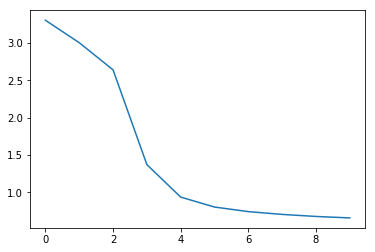

predictions for model lstm_model_003 were saved
Runtime:  2721.7497203350067


In [179]:
# removed outliers in Test set and increased epochs added metrics mae and plot it, 
#added statefull=True, increase batch size 14*24h*30days=10080
model_name = 'lstm_model_003'
epochs = 10
file = model_name+".csv"


data_dim = 14
timesteps = 24
batch_size = 24





start_ts=time.time()

model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(timesteps, dim)))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(500))
model.add(Dense(1))


rms = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
model.compile(loss='mae', optimizer=rms, metrics=['mae'])
model.summary()
history = model.fit(train_x_ts_norm2, train_y_ts_norm, batch_size=batch_size, epochs=epochs, shuffle=False)
predictions = model.predict(test_x_ts_norm2, verbose=1)
print(predictions.shape)

pyplot.plot(history.history['mean_absolute_error'])
pyplot.show()

with open(file, newline='', mode='w') as f:
    wr = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    wr.writerow(['date time','temperature'])
    count = 1
    for i,j in zip(date[0:].values,predictions):
        row = list(np.append(str(i[0]), j[0]))
        wr.writerow(row)
        count += 1

f.close()
end_ts= time.time()
print('predictions for model %s were saved' % model_name)
print("Runtime: ", end_ts-start_ts)



# pyplot.plot(predictions)
# pyplot.show()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 24, 32)            6016      
_________________________________________________________________
lstm_5 (LSTM)                (None, 24, 32)            8320      
_________________________________________________________________
lstm_6 (LSTM)                (None, 500)               1066000   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 501       
Total params: 1,080,837
Trainable params: 1,080,837
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
52542/52542 [==============================] - 265s 5ms/step - loss: 2.4608 - mean_absolute_error: 2.4608
Epoch 2/30
52542/52542 [==============================] - 262s 5ms/step - loss: 1.0133 - mean_absolute_error: 1.0133
Epoch 3/30
52542/52542 [======

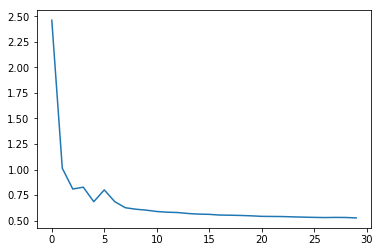

predictions for model lstm_model_003 were saved
Runtime:  7933.244255304337


In [51]:
# removed outliers in Test set and increased epochs added metrics mae and plot it, 
#added statefull=True, increase batch size 14*24h*30days=10080

# same model as # 3 but no removal of outliers from test, since it looks like I got worse performance 

model_name = 'lstm_model_003'
epochs = 30
file = model_name+".csv"


data_dim = 14
timesteps = 24
batch_size = 24





start_ts=time.time()

model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(timesteps, data_dim)))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(500))
model.add(Dense(1))


rms = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
model.compile(loss='mae', optimizer=rms, metrics=['mae'])
model.summary()
history = model.fit(train_x_ts_norm2, train_y_ts_norm, batch_size=batch_size, epochs=epochs, shuffle=False)
predictions = model.predict(test_x_ts_norm2, verbose=1)
print(predictions.shape)

pyplot.plot(history.history['mean_absolute_error'])
pyplot.show()

with open(file, newline='', mode='w') as f:
    wr = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    wr.writerow(['date time','temperature'])
    count = 1
    for i,j in zip(date[0:].values,predictions):
        row = list(np.append(str(i[0]), j[0]))
        wr.writerow(row)
        count += 1

f.close()
end_ts= time.time()
print('predictions for model %s were saved' % model_name)
print("Runtime: ", end_ts-start_ts)



# pyplot.plot(predictions)
# pyplot.show()


